In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Electron current for $V_{FEP} = -50V$

In [19]:
hv_50 = [50, 150, 250, 900, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600]#, 1650] #in V
multi_50 = [0.065, 0.050, 0.050, 0.050, 0.113, 0.229, 0.390, 0.770, 1.340, 2.680, 4.320, 7.100, 11.4, 18.5, 30.5, 50, 83]#, 70] #in mV
err_multi_50 = [0.003, 0.003, 0.003, 0.002, 0.002, 0.004, 0.005, 0.050, 0.070, 0.080, 0.300, 0.300, 0.4, 0.8, 3.5, 10, 12]#, 40]

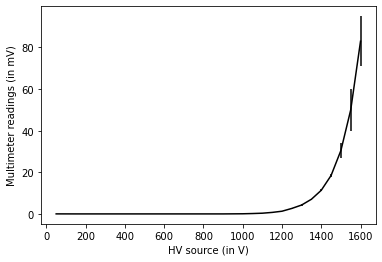

In [20]:
plt.errorbar(hv_50, multi_50, yerr=err_multi_50, label='both limits (default)', color='black')
plt.xlabel('HV source (in V)')
plt.ylabel('Multimeter readings (in mV)');

## Electron current for $V_{FEP} = -100V$

In [14]:
hv_100 = [50, 150, 250, 900, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
multi_100 = [0.097, 0.092, 0.084, 0.085, 0.094, 0.160, 0.570, 1.2, 3.3, 4.0, 7.5,18, 34, 50]
err_multi_100 = [0.003, 0.004, 0.007, 0.010, 0.015, 0.020, 0.150, 0.25, 0.6, 1.7, 1.8, 3, 10, 25]
print(len(hv_100), len(multi_100), len(err_multi_100))

14 14 14


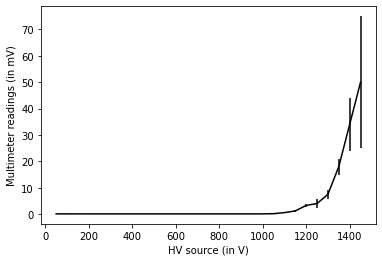

In [15]:
plt.errorbar(hv_100, multi_100, yerr=err_multi_100, label='both limits (default)', color='black')
plt.xlabel('HV source (in V)')
plt.ylabel('Multimeter readings (in mV)');

## Electron current for $V_{FEP} = -350V$

In [17]:
hv_350 = [50, 150, 250, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350]
multi_350 = [0.380, 0.360, 0.342, 1.09, 1.83, 2.7, 4.25, 6.9, 11.0, 19.5, 41, 52, 100]
err_multi_350 = [0.01, 0.02, 0.02, 0.05, 0.07, 0.15, 0.25, 0.3, 0.8, 1.5, 2.5, 10, 25]

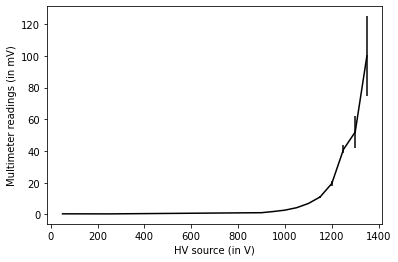

In [18]:
plt.errorbar(hv_350, multi_350, yerr=err_multi_350, label='both limits (default)', color='black')
plt.xlabel('HV source (in V)')
plt.ylabel('Multimeter readings (in mV)');

## Electron current for $V_{FEP} = -500V$

In [22]:
hv_500 = [50, 150, 250, 900, 950, 1000, 1050, 1100]
multi_500 = [0.52, 0.500, 0.500, 2.9, 7.5, 17, 33, 60]
err_multi_500 = [0.015, 0.015, 0.02, 0.15, 1.1, 4, 7, 20]

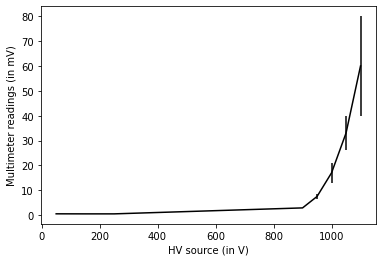

In [23]:
plt.errorbar(hv_500, multi_500, yerr=err_multi_500, label='both limits (default)', color='black')
plt.xlabel('HV source (in V)')
plt.ylabel('Multimeter readings (in mV)');

## Fowler-Nordheim Equation Fit

$$\begin{equation}
j(E) = \frac{q^3m^*}{8\pi mh\Phi} E^2 \exp{\left(- \frac{4 \sqrt{2m\Phi^3}}{3hqE}\right)} \\
     = K_1 \frac{|E|^2}{\Phi} \exp{\left(- K_2 \frac{\Phi^{3/2}}{E}\right)}
\end{equation}$$

In [24]:
from scipy.optimize import curve_fit

In [25]:
def fit(x, k_1, k_2):
    phi = 4.50 #work function of Tungsten (in eV)
    y = k_1 * ( (x**2) / phi) * np.exp(-k_2 * ( phi**(3/2) / x ))
    return y

### Fit for $V_{FEP} = -50V$

In [31]:
parameters_50, covariance = curve_fit(fit, hv_50, multi_50)
k_1_50 = parameters_50[0]
k_2_50 = parameters_50[1]
print(k_1_50)
print(k_2_50)

37.94805149293933
2091.893087079962


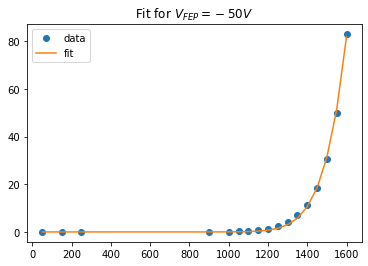

In [33]:
fit_y_50 = fit(np.array(hv_50), k_1_50, k_2_50)
plt.plot(hv_50, multi_50, 'o', label='data')
plt.plot(hv_50, fit_y_50, '-', label='fit')
plt.title("Fit for $V_{FEP} = -50V$")
plt.legend();

In [34]:
hv_100, hv_350, hv_500 = np.array(hv_100), np.array(hv_350), np.array(hv_500)

### Fit for $V_{FEP} = -100V$

In [36]:
corr_hv_100 = 100 + hv_100
parameters_100, covariance = curve_fit(fit, corr_hv_100, multi_100)
k_1_100 = parameters_100[0]
k_2_100 = parameters_100[1]
print(k_1_100)
print(k_2_100)

63.55773890562773
2175.8882180082164


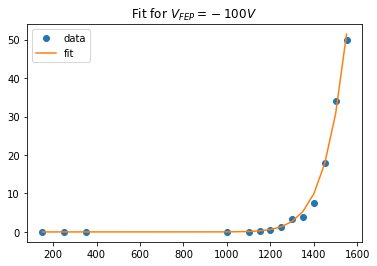

In [39]:
fit_y_100 = fit(np.array(corr_hv_100), k_1_100, k_2_100)
plt.plot(corr_hv_100, multi_100, 'o', label='data')
plt.plot(corr_hv_100, fit_y_100, '-', label='fit')
plt.title("Fit for $V_{FEP} = -100V$")
plt.legend();

### Fit for $V_{FEP} = -350V$

In [40]:
corr_hv_350 = 350 + hv_350
parameters_350, covariance = curve_fit(fit, corr_hv_350, multi_350)
k_1_350 = parameters_350[0]
k_2_350 = parameters_350[1]
print(k_1_350)
print(k_2_350)

256.13123334473994
2553.5393783604736


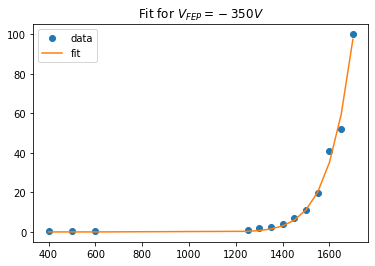

In [41]:
fit_y_350 = fit(np.array(corr_hv_350), k_1_350, k_2_350)
plt.plot(corr_hv_350, multi_350, 'o', label='data')
plt.plot(corr_hv_350, fit_y_350, '-', label='fit')
plt.title("Fit for $V_{FEP} = -350V$")
plt.legend();

### Fit for $V_{FEP} = -500V$

In [42]:
corr_hv_500 = 500 + hv_500
parameters_500, covariance = curve_fit(fit, corr_hv_500, multi_500)
k_1_500 = parameters_500[0]
k_2_500 = parameters_500[1]
print(k_1_500)
print(k_2_500)

3753.3926679157535
2913.4556603885544


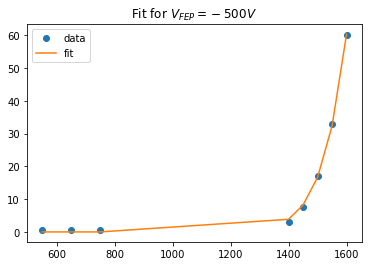

In [45]:
fit_y_500 = fit(np.array(corr_hv_500), k_1_500, k_2_500)
plt.plot(corr_hv_500, multi_500, 'o', label='data')
plt.plot(corr_hv_500, fit_y_500, '-', label='fit')
plt.title("Fit for $V_{FEP} = -500V$")
plt.legend();

# Comparison

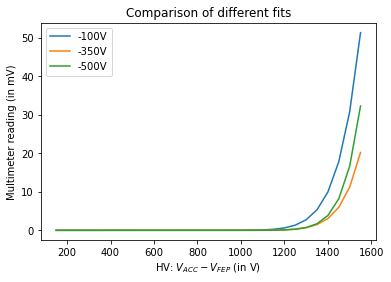

In [47]:
fit_y_100_comp = fit(np.array(corr_hv_100), k_1_100, k_2_100)
fit_y_350_comp = fit(np.array(corr_hv_100), k_1_350, k_2_350)
fit_y_500_comp = fit(np.array(corr_hv_100), k_1_500, k_2_500)
plt.plot(corr_hv_100, fit_y_100_comp, label='-100V')
plt.plot(corr_hv_100, fit_y_350_comp, label='-350V')
plt.plot(corr_hv_100, fit_y_500_comp, label='-500V')
plt.xlabel("HV: $V_{ACC} - V_{FEP}$ (in V)")
plt.ylabel("Multimeter reading (in mV)")
plt.title("Comparison of different fits")
plt.legend();